In [2]:
import pandas as pd
from math import ceil, log, log2
import matplotlib.pyplot as plt

## FastPIR

In [3]:

fastpir = pd.read_csv('fastpir.csv')
fastpir['log_n'] = fastpir['n'].apply(lambda x: int(ceil(log(x, 2))))
fastpir['total Communication (in MB) for 256 KB Record Size'] = ((fastpir['Gal Keys (KB)'] + fastpir['Query size (KB)'] + 26 * fastpir['Response size (KB)']) / 1024).apply(lambda x: ceil(x))
fastpir['total Communication (in KB) for Routing'] = ((fastpir['Gal Keys (KB)'] + fastpir['Query size (KB)'] + fastpir['Response size (KB)']))
fastpir

,n,Gal Keys (KB),Query size (KB),Response size (KB),Response generation time (s),log_n,total Communication (in MB) for 256 KB Record Size,total Communication (in KB) for Routing
0,4,670.12,64.0,64.0,1.13,2,3,798.12
1,8,670.15,64.0,64.0,1.08,3,3,798.15
2,16,670.09,64.0,64.0,0.91,4,3,798.09
3,32,670.13,64.0,64.0,0.98,5,3,798.13
4,64,670.07,64.0,64.0,1.04,6,3,798.07
5,128,670.18,64.0,64.0,0.97,7,3,798.18
6,256,670.14,64.0,64.0,1.26,8,3,798.14
7,512,670.03,64.0,64.0,1.14,9,3,798.03
8,1024,670.02,64.0,64.0,0.99,10,3,798.02
9,2048,670.07,64.0,64.0,0.95,11,3,798.07


[]

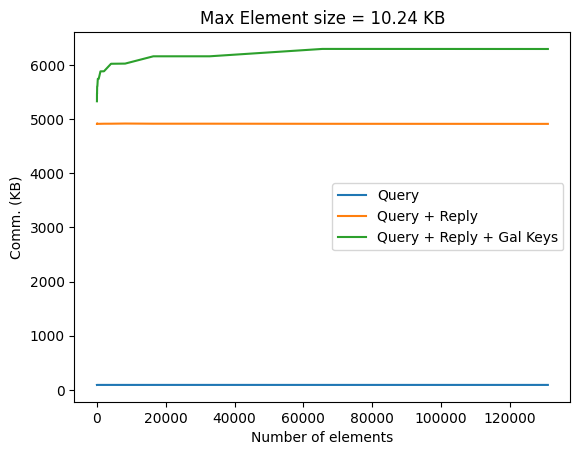

In [4]:
sealpir=pd.read_csv('sealpir.csv')
for col in ['Main Query Size','Main Reply Size','Size Gal Keys']:
    sealpir[col] = sealpir[col] / 1000

plt.plot(sealpir['Number of Elements'], sealpir['Main Query Size'], label='Query')
plt.plot(sealpir['Number of Elements'], 26 * sealpir['Main Reply Size'] + sealpir['Main Query Size'], label='Query + Reply')
plt.plot(sealpir['Number of Elements'], sealpir['Size Gal Keys'] + 26 * sealpir['Main Reply Size']+sealpir['Main Query Size'], label='Query + Reply + Gal Keys')
plt.ylabel("Comm. (KB)")
plt.xlabel("Number of elements")
plt.title("Max Element size = 10.24 KB")
plt.legend()
plt.plot()

[]

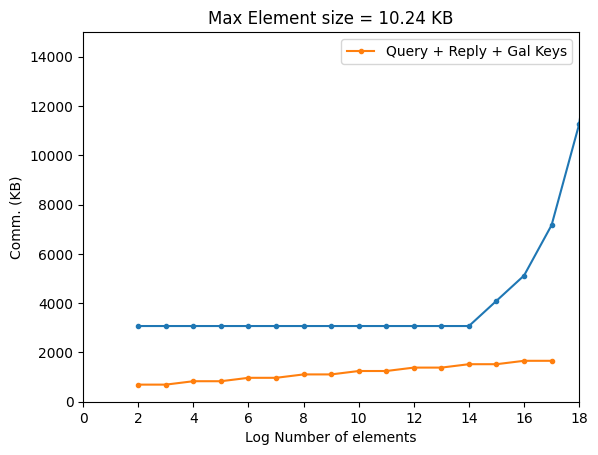

In [9]:
plt.plot(fastpir['log_n'], 1024 * fastpir['total Communication (in MB) for 256 KB Record Size'], '.-')
# plt.plot(sealpir['Number of Elements'].apply(lambda x: log2(x)), sealpir['Size Gal Keys']+sealpir['Main Reply Size']+sealpir['Main Query Size'], '.-', label='Query + Reply + Gal Keys')

plt.ylabel("Comm. (KB)")
plt.xlabel("Log Number of elements")
# plt.xlim(0, 18)
# plt.ylim(0, 15000)
plt.title("Max Element size = 10.24 KB")
plt.legend()
plt.plot()